# Analyse de base des fichiers éducation nationale. 
Objectif : voir les données, trouvé des pistes pour comprendre l'echec scolaire.

In [1]:
# import bibliothéques d'analyse de python
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import FuncFormatter
import seaborn as sns


In [2]:
# import des données en RAM avec pandas
effectif_prim = pd.read_csv("donnee/fr-en-ecoles-effectifs-nb_classes.csv",sep=";")
ecole_stat = pd.read_csv("donnee/fr-en-ips-ecoles-ap2022.csv",sep=";")


## Affichage des entêtes des données
Pour les écoles primaires :

In [3]:
effectif_prim.head(1)

,rentree_scolaire,region_academique,academie,departement,commune,numero_ecole,denomination_principale,patronyme,secteur,rep,...,nombre_eleves_preelementaire_hors_ulis,nombre_eleves_elementaire_hors_ulis,nombre_eleves_ulis,nombre_eleves_cp_hors_ulis,nombre_eleves_ce1_hors_ulis,nombre_eleves_ce2_hors_ulis,nombre_eleves_cm1_hors_ulis,nombre_eleves_cm2_hors_ulis,tri,code_postal
0,2022,AUVERGNE-ET-RHONE-ALPES,CLERMONT-FERRAND,ALLIER,ABREST,0030701W,ECOLE PRIMAIRE PUBLIQUE,NaN,PUBLIC,0,...,56,108,0,16,22,18,31,21,78-AUVERGNE-ET-RHONE-ALPES-CLERMONT-FERRAND-AL...,3200


In [4]:
effectif_prim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194898 entries, 0 to 194897
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   rentree_scolaire                        194898 non-null  int64 
 1   region_academique                       194898 non-null  object
 2   academie                                194898 non-null  object
 3   departement                             194898 non-null  object
 4   commune                                 194898 non-null  object
 5   numero_ecole                            194898 non-null  object
 6   denomination_principale                 194897 non-null  object
 7   patronyme                               148531 non-null  object
 8   secteur                                 194898 non-null  object
 9   rep                                     194898 non-null  int64 
 10  rep_plus                                194898 non-null 

Le fichier effectif contient 23 colonnes.<br>
Il contient l'année scolaire  ainsi que de quoi identifier les établissements, dont un numero d'école qui peut servir d'identifiant.<br>
Le fichier contient aussi les effectifs des classes du CP au CM2 ainsi que les effectifs totals des élèves en école maternelle. 

In [5]:
ecole_stat.head(1)

,rentree_scolaire,academie,code_du_departement,departement,uai,nom_de_l_etablissment,code_insee_de_la_commune,nom_de_la_commune,secteur,effectifs,ips
0,2022-2023,MONTPELLIER,066,PYRENEES-ORIENTALES,0660242E,ECOLE ELEMENTAIRE,66059,CORNEILLA DEL VERCOL,public,133.0,105.2


In [6]:
ecole_stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30059 entries, 0 to 30058
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   rentree_scolaire          30059 non-null  object 
 1   academie                  30059 non-null  object 
 2   code_du_departement       30059 non-null  object 
 3   departement               30059 non-null  object 
 4   uai                       30059 non-null  object 
 5   nom_de_l_etablissment     30059 non-null  object 
 6   code_insee_de_la_commune  30059 non-null  object 
 7   nom_de_la_commune         30059 non-null  object 
 8   secteur                   30059 non-null  object 
 9   effectifs                 30059 non-null  float64
 10  ips                       30059 non-null  float64
dtypes: float64(2), object(9)
memory usage: 2.5+ MB


Le fichier contient la l'année de la rentré ainsi que les effectifs et l'Indice de Position Sociale (IPS) moyen de l école.

# premier nettoyage

Standariser les catègories public privé dans la colonne secteur.<br>
Standariser les rentrées scolaires<br>
Voir pour réduire le nombre de colonne des fichiers.<br>
enlever la colone tri dans effectif ecole<br>
regrouper les données dans un seul fichier ecole.csv<br>


In [7]:
ecole_stat['secteur'].unique()

array(['public', 'privé sous contrat'], dtype=object)

In [8]:
effectif_prim['secteur'].unique()

array(['PUBLIC', 'PRIVE'], dtype=object)

In [9]:
# changement dans les data ecole_stat['secteur'] et college_stat['secteur']
# Les valeurs doivent être PRIVE ou PUBLIC
ecole_stat['secteur'].replace({'public':'PUBLIC','privé sous contrat':'PRIVE'},inplace=True)

In [10]:
effectif_prim['rentree_scolaire'].unique()

array([2022, 2021, 2020, 2019])

In [11]:
ecole_stat['rentree_scolaire'].unique()

array(['2022-2023'], dtype=object)

In [12]:
# remplacer dans les données ecoles_stat colonne rentree_scolaire 2022-2023 par 2022
ecole_stat['rentree_scolaire'].replace({'2022-2023':2022},inplace=True)

In [13]:
effectif_prim.drop(columns='tri',inplace=True)

In [14]:
# patronyme contient des Nan remplcer par un espaces
effectif_prim['patronyme'].fillna(" ",inplace=True)

In [15]:
effectif_prim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194898 entries, 0 to 194897
Data columns (total 22 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   rentree_scolaire                        194898 non-null  int64 
 1   region_academique                       194898 non-null  object
 2   academie                                194898 non-null  object
 3   departement                             194898 non-null  object
 4   commune                                 194898 non-null  object
 5   numero_ecole                            194898 non-null  object
 6   denomination_principale                 194897 non-null  object
 7   patronyme                               194898 non-null  object
 8   secteur                                 194898 non-null  object
 9   rep                                     194898 non-null  int64 
 10  rep_plus                                194898 non-null 

In [16]:
effectif_prim[effectif_prim['numero_ecole'] == '0691092M']

,rentree_scolaire,region_academique,academie,departement,commune,numero_ecole,denomination_principale,patronyme,secteur,rep,...,nombre_total_eleves,nombre_eleves_preelementaire_hors_ulis,nombre_eleves_elementaire_hors_ulis,nombre_eleves_ulis,nombre_eleves_cp_hors_ulis,nombre_eleves_ce1_hors_ulis,nombre_eleves_ce2_hors_ulis,nombre_eleves_cm1_hors_ulis,nombre_eleves_cm2_hors_ulis,code_postal
5168,2022,AUVERGNE-ET-RHONE-ALPES,LYON,RHONE,DENICE,0691092M,ECOLE PRIMAIRE PUBLIQUE,,PUBLIC,0,...,104,40,64,0,17,15,9,9,14,69640
53422,2021,AUVERGNE-ET-RHONE-ALPES,LYON,RHONE,DENICE,0691092M,ECOLE PRIMAIRE PUBLIQUE,,PUBLIC,0,...,113,50,63,0,13,9,9,14,18,69640
102029,2020,AUVERGNE-ET-RHONE-ALPES,LYON,RHONE,DENICE,0691092M,ECOLE PRIMAIRE PUBLIQUE,,PUBLIC,0,...,107,45,62,0,8,7,14,17,16,69640
150994,2019,AUVERGNE-ET-RHONE-ALPES,LYON,RHONE,DENICE,0691092M,ECOLE PRIMAIRE PUBLIQUE,,PUBLIC,0,...,110,37,73,0,8,14,18,17,16,69640


In [17]:
effectif_prim[(effectif_prim.rep == 1) & (effectif_prim.rep_plus == 1)]

,rentree_scolaire,region_academique,academie,departement,commune,numero_ecole,denomination_principale,patronyme,secteur,rep,...,nombre_total_eleves,nombre_eleves_preelementaire_hors_ulis,nombre_eleves_elementaire_hors_ulis,nombre_eleves_ulis,nombre_eleves_cp_hors_ulis,nombre_eleves_ce1_hors_ulis,nombre_eleves_ce2_hors_ulis,nombre_eleves_cm1_hors_ulis,nombre_eleves_cm2_hors_ulis,code_postal
159139,2019,CORSE,CORSE,HAUTE-CORSE,AGHIONE,7200296J,ECOLE ELEMENTAIRE PUBLIQUE,AGHIONE,PUBLIC,1,...,21,0,21,0,5,2,6,4,4,20270


In [18]:
fichier_ecole_elementaire = pd.merge(ecole_stat,effectif_prim,left_on=['rentree_scolaire','uai'],right_on=['rentree_scolaire','numero_ecole'],how='outer')

In [19]:
fichier_ecole_elementaire.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194898 entries, 0 to 194897
Data columns (total 32 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   rentree_scolaire                        194898 non-null  int64  
 1   academie_x                              30059 non-null   object 
 2   code_du_departement                     30059 non-null   object 
 3   departement_x                           30059 non-null   object 
 4   uai                                     30059 non-null   object 
 5   nom_de_l_etablissment                   30059 non-null   object 
 6   code_insee_de_la_commune                30059 non-null   object 
 7   nom_de_la_commune                       30059 non-null   object 
 8   secteur_x                               30059 non-null   object 
 9   effectifs                               30059 non-null   float64
 10  ips                                     3005

In [20]:
# supression colonne en double
fichier_ecole_elementaire.drop(columns=['academie_x','departement_x','secteur_x'],inplace=True)
# renomme les colonnes avec un _y
fichier_ecole_elementaire.rename(columns={'academie_y':'academie','departement_y':'departement','secteur_y':'secteur'},inplace=True)

## graphes France généraux école primaire :
Première Analyse :<br>
voir l évolution des effectifs globale des effectifs en primaire<br>
voir la repartition dans les classes en 2022<br>

In [21]:
# style graphe :
sns.set_theme(style="whitegrid")
#plt.style.use("dark_background")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_palette("pastel")
palette = sns.color_palette("pastel").as_hex()

In [22]:
france_ecole = fichier_ecole_elementaire.groupby(by='rentree_scolaire').sum(numeric_only=True)

france_ecole_mean = fichier_ecole_elementaire.groupby(by='rentree_scolaire').agg({"effectifs":"mean",'ips':'mean'},numeric_only=True)
france_ecole.reset_index(inplace=True)
france_ecole_mean.reset_index(inplace=True)
france_ecole = pd.merge(france_ecole,france_ecole_mean,on=['rentree_scolaire'],how='outer')
france_ecole.drop(columns=['effectifs_x','ips_x'],inplace=True)
france_ecole.rename(columns={'effectifs_y':'effectifs','ips_y':'ips'},inplace=True)
del france_ecole_mean

In [23]:
france_ecole["pourcentage_ulis"] = france_ecole["nombre_eleves_ulis"] / france_ecole["nombre_total_eleves"] *100
france_ecole["ulis_moyen_classe"] = france_ecole["nombre_eleves_ulis"] / france_ecole["nombre_total_classes"]

In [24]:
france_ecole.head()

,rentree_scolaire,rep,rep_plus,nombre_total_classes,nombre_total_eleves,nombre_eleves_preelementaire_hors_ulis,nombre_eleves_elementaire_hors_ulis,nombre_eleves_ulis,nombre_eleves_cp_hors_ulis,nombre_eleves_ce1_hors_ulis,nombre_eleves_ce2_hors_ulis,nombre_eleves_cm1_hors_ulis,nombre_eleves_cm2_hors_ulis,code_postal,effectifs,ips,pourcentage_ulis,ulis_moyen_classe
0,2019,4208,2455,294261,6653465,2441820,4160847,50798,827029,833242,831215,835383,833978,2627935323,NaN,NaN,0.763482,0.172629
1,2020,4189,2458,296560,6565847,2374980,4137960,52907,823870,820717,831154,824201,838018,2617169842,NaN,NaN,0.805791,0.178402
2,2021,4168,2458,297010,6481517,2337371,4090022,54124,804533,819138,817486,822840,826025,2598162900,NaN,NaN,0.835051,0.182230
3,2022,4152,2456,296963,6422791,2314893,4052461,55437,790617,801485,820246,813113,827000,2580389098,126.838651,104.239333,0.863129,0.186680


In [25]:
france_ecole["Nombre_eleves_par_classe_moyenne"] = france_ecole['nombre_total_eleves'] / france_ecole['nombre_total_classes']

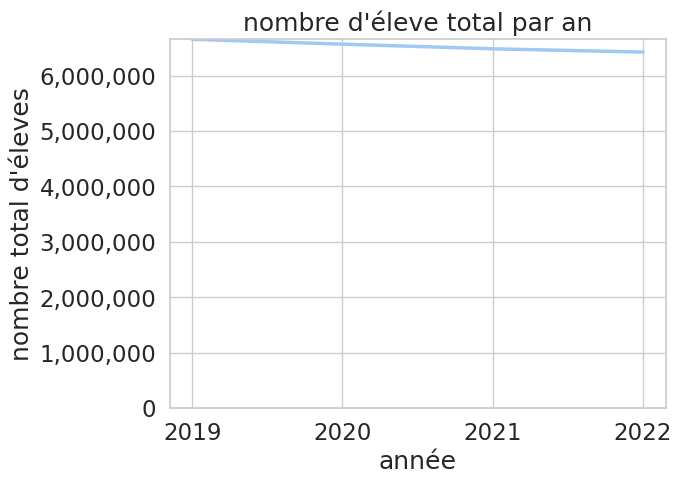

In [26]:
fig,ax = plt.subplots()
sns.lineplot(data=france_ecole,x='rentree_scolaire',y='nombre_total_eleves',ax=ax)
ax.set_ylim(0)
ax.ticklabel_format(axis='y',style='plain')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ",")))
ax.set_title("nombre d'éleve total par an")
ax.set_xlabel("année")
ax.set_ylabel("nombre total d'éleves")
plt.show()


Le nombre d'éleve baisse depuis 4 ans.

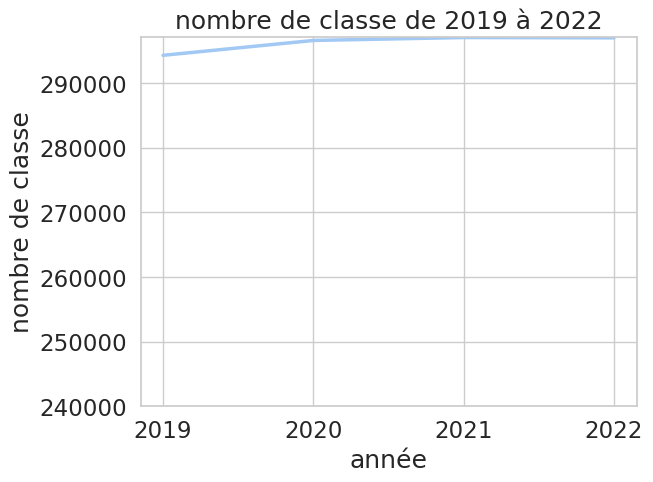

In [27]:
fig,ax = plt.subplots()
sns.lineplot(data=france_ecole,x='rentree_scolaire',y='nombre_total_classes',ax=ax)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_title("nombre de classe de 2019 à 2022")
ax.set_xlabel("année")
ax.set_ylabel("nombre de classe")
ax.set_ylim(240000)
plt.show()

Le nombre de classe augmente. 

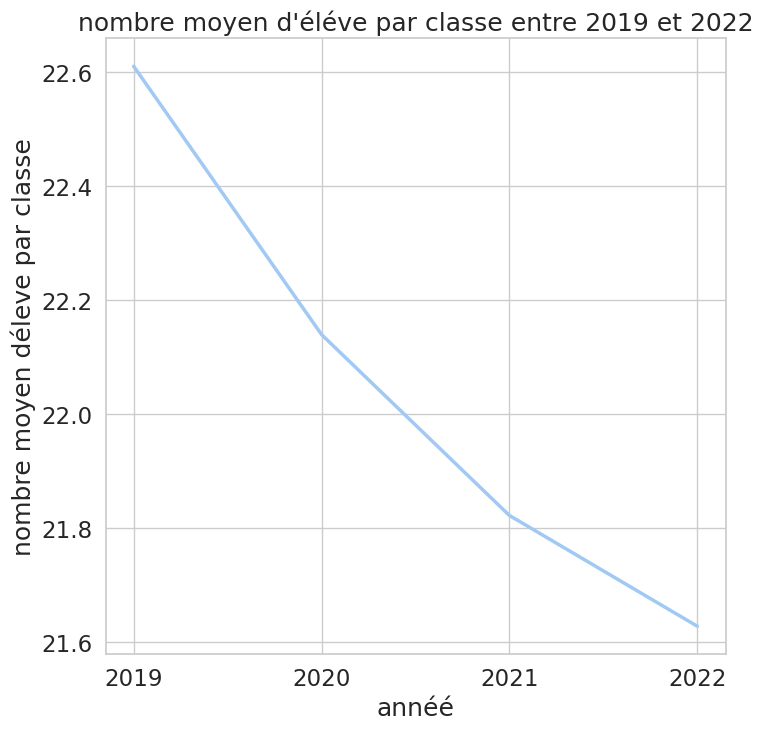

In [28]:
fig,ax = plt.subplots()
fig.set_size_inches(8,8)
sns.lineplot(data=france_ecole,x='rentree_scolaire',y='Nombre_eleves_par_classe_moyenne',ax=ax)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_title("nombre moyen d'éléve par classe entre 2019 et 2022")
ax.set_xlabel("annéé")
ax.set_ylabel("nombre moyen déleve par classe")
ax.set_ylim()
plt.show()

Le nombre d´éléve diminue et le nombre de classe augmente. Sans surprise le nombre moyen d'éléve par classe diminue.

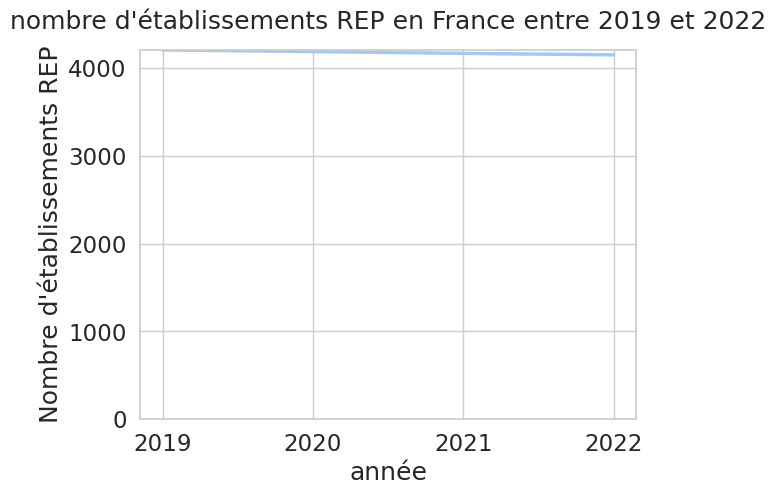

In [29]:
fig,ax = plt.subplots()
sns.lineplot(data=france_ecole,x='rentree_scolaire',y='rep',ax=ax)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_title("nombre d'établissements REP en France entre 2019 et 2022",pad=15)
ax.set_xlabel("année")
ax.set_ylabel("Nombre d'établissements REP")
ax.set_ylim(0)
plt.show()

Le nombre d'établissement en wone REP baisse légérement.

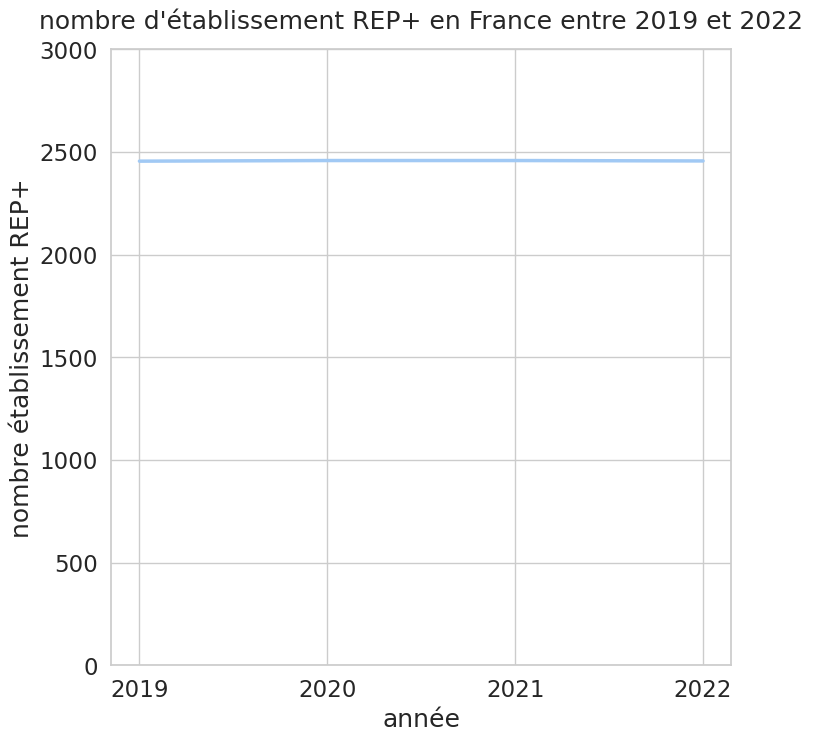

In [30]:
fig,ax = plt.subplots()
fig.set_size_inches(8,8)
sns.lineplot(data=france_ecole,x='rentree_scolaire',y='rep_plus',ax=ax)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_title("nombre d'établissement REP+ en France entre 2019 et 2022",pad=15)
ax.set_xlabel("année")
ax.set_ylabel("nombre établissement REP+")
ax.set_ylim(0,3000)
plt.show()

Le nombre d'établissement en zone REP + est stable.

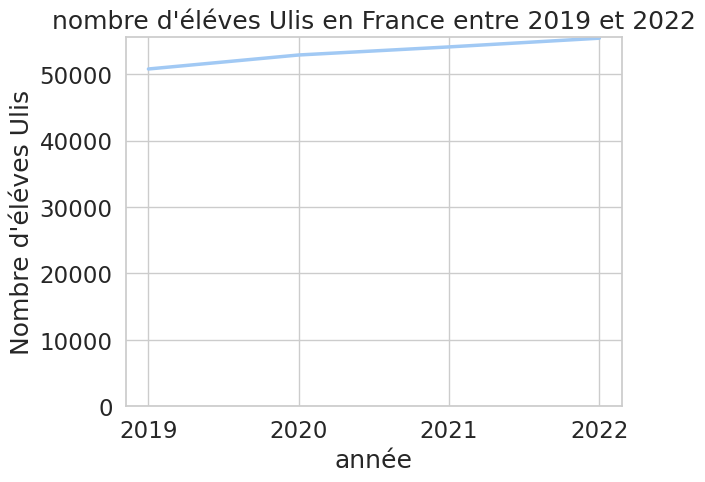

In [31]:
fig,ax = plt.subplots()
sns.lineplot(data=france_ecole,x='rentree_scolaire',y='nombre_eleves_ulis',ax=ax)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_title("nombre d'éléves Ulis en France entre 2019 et 2022")
ax.set_xlabel("année")
ax.set_ylabel("Nombre d'éléves Ulis")
ax.set_ylim(0)
plt.show()

Le nombre d'éléves Ulis augmente depuis 4 ans.

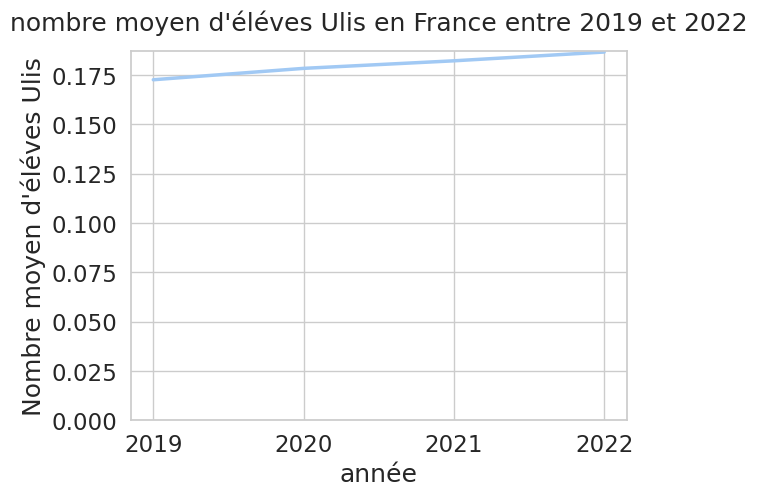

In [32]:
fig,ax = plt.subplots()
sns.lineplot(data=france_ecole,x='rentree_scolaire',y='ulis_moyen_classe',ax=ax)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_title("nombre moyen d'éléves Ulis en France entre 2019 et 2022",pad=15)
ax.set_xlabel("année")
ax.set_ylabel("Nombre moyen d'éléves Ulis")
ax.set_ylim(0)
plt.show()

Environ une classe sur 6 à un éléve Ulis.

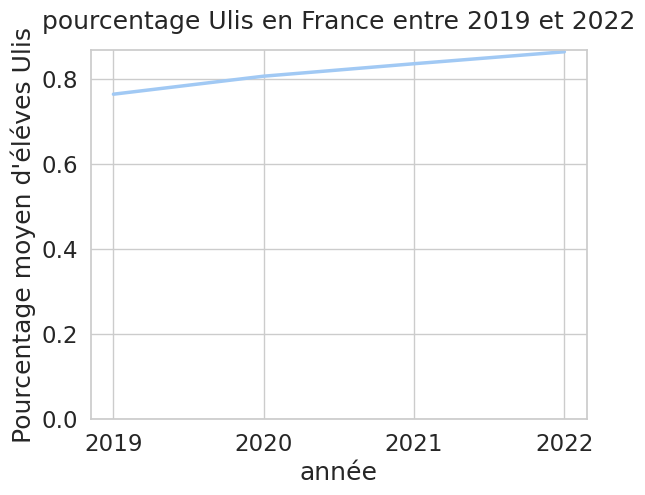

In [33]:
fig,ax = plt.subplots()
sns.lineplot(data=france_ecole,x='rentree_scolaire',y='pourcentage_ulis',ax=ax)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_title("pourcentage Ulis en France entre 2019 et 2022",pad=15)
ax.set_xlabel("année")
ax.set_ylabel("Pourcentage moyen d'éléves Ulis")
ax.set_ylim(0)
plt.show()

Les ulis representent environ 1 éléve sur 100. 

In [34]:
#ce limité a 2022 et voir les ulis dans les classes
# donnée non dispo ?

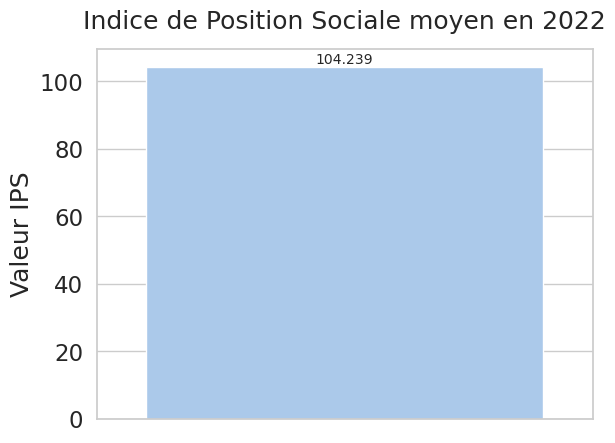

In [35]:

fig,ax = plt.subplots()
sns.barplot(data=france_ecole, y="ips",ax=ax,estimator="sum",errorbar=None)
ax.set_title("Indice de Position Sociale moyen en 2022",pad=15)
ax.set_ylabel("Valeur IPS")
ax.bar_label(ax.containers[0], fontsize=10)
ax.set_ylim(0)
plt.show()

Conclusion France général: <br>
Le nombre d'éléve par classe à baisser en France. Cela est du en partie à une baisse du nombre d'éléve, mais aussi à l'augmentation du nombre de classe.
Il faut aussi noter une augmentation du nombre d'éléve Ulis qui nécéssite plus d'attention. 

In [36]:
# libéré un peu de mémoire. 
del france_ecole

# Analyse générale public/privée en France

In [37]:
# creer un fichier france privée_public
france_ecole_public_prive_mean = fichier_ecole_elementaire.groupby(by=['rentree_scolaire','secteur']).agg({"effectifs":"mean",'ips':'mean'},numeric_only=True)
france_ecole_public_prive = fichier_ecole_elementaire.groupby(by=['rentree_scolaire','secteur']).sum(numeric_only=True)
france_ecole_public_prive.reset_index(inplace=True)
france_ecole_public_prive_mean.reset_index(inplace=True)
france_ecole_public_prive = pd.merge(france_ecole_public_prive,france_ecole_public_prive_mean,on=['rentree_scolaire','secteur'],how='outer')
france_ecole_public_prive.drop(columns=['effectifs_x','ips_x'],inplace=True)
france_ecole_public_prive.rename(columns={'effectifs_y':'effectifs','ips_y':'ips'},inplace=True)
del france_ecole_public_prive_mean

In [38]:
france_ecole_public_prive["pourcentage_ulis"] = france_ecole_public_prive["nombre_eleves_ulis"] / france_ecole_public_prive["nombre_total_eleves"] *100
france_ecole_public_prive["ulis_moyen_classe"] = france_ecole_public_prive["nombre_eleves_ulis"] / france_ecole_public_prive["nombre_total_classes"]
france_ecole_public_prive["Nombre_eleves_par_classe_moyenne"] = france_ecole_public_prive['nombre_total_eleves'] / france_ecole_public_prive['nombre_total_classes']

In [39]:
france_ecole_public_prive.head(10)

,rentree_scolaire,secteur,rep,rep_plus,nombre_total_classes,nombre_total_eleves,nombre_eleves_preelementaire_hors_ulis,nombre_eleves_elementaire_hors_ulis,nombre_eleves_ulis,nombre_eleves_cp_hors_ulis,nombre_eleves_ce1_hors_ulis,nombre_eleves_ce2_hors_ulis,nombre_eleves_cm1_hors_ulis,nombre_eleves_cm2_hors_ulis,code_postal,effectifs,ips,pourcentage_ulis,ulis_moyen_classe,Nombre_eleves_par_classe_moyenne
0,2019,PRIVE,0,0,35650,888584,299965,585382,3237,111142,113515,117016,120458,123251,240094979,NaN,NaN,0.364287,0.090799,24.925217
1,2019,PUBLIC,4208,2455,258611,5764881,2141855,3575465,47561,715887,719727,714199,714925,710727,2387840344,NaN,NaN,0.825013,0.183909,22.291708
2,2020,PRIVE,0,0,35707,874126,291332,579462,3332,110292,111942,115290,118937,123001,239509490,NaN,NaN,0.381181,0.093315,24.480522
3,2020,PUBLIC,4189,2458,260853,5691721,2083648,3558498,49575,713578,708775,715864,705264,715017,2377660352,NaN,NaN,0.871002,0.190050,21.819649
4,2021,PRIVE,0,0,35384,867704,289254,574856,3594,108239,112057,114427,118184,121949,238791971,NaN,NaN,0.414197,0.101571,24.522496
5,2021,PUBLIC,4168,2458,261626,5613813,2048117,3515166,50530,696294,707081,703059,704656,704076,2359370929,NaN,NaN,0.900101,0.193138,21.457397
6,2022,PRIVE,0,0,35139,858677,286510,568505,3662,106348,109546,114262,117231,121118,237702508,135.900540,114.370514,0.426470,0.104215,24.436580
7,2022,PUBLIC,4152,2456,261824,5564114,2028383,3483956,51775,684269,691939,705984,695882,705882,2342686590,125.341099,102.565072,0.930517,0.197747,21.251352


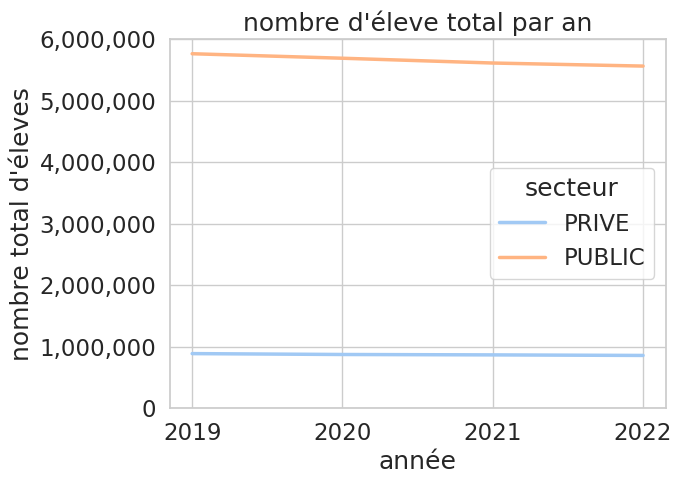

In [40]:
fig,ax = plt.subplots()
sns.lineplot(data=france_ecole_public_prive,x='rentree_scolaire',y='nombre_total_eleves',hue="secteur",ax=ax)
ax.set_ylim(0)
ax.ticklabel_format(axis='y',style='plain')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ",")))
ax.set_title("nombre d'éleve total par an")
ax.set_xlabel("année")
ax.set_ylabel("nombre total d'éleves")
plt.show()

Le secteur public connait une plus forte baisse du nombre d'éléve que le privée.<br>
Le secteur privée reste relativement stable mais en légére baisse<br>

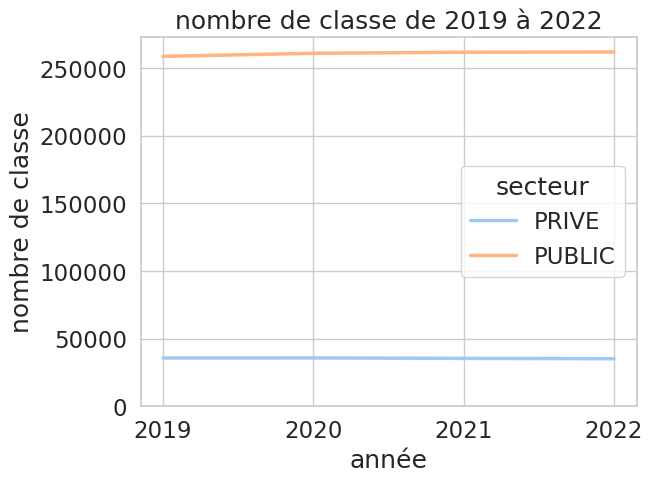

In [41]:
fig,ax = plt.subplots()
sns.lineplot(data=france_ecole_public_prive,x='rentree_scolaire',y='nombre_total_classes',hue="secteur",ax=ax)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_title("nombre de classe de 2019 à 2022")
ax.set_xlabel("année")
ax.set_ylabel("nombre de classe")
ax.set_ylim(0)
plt.show()

Le nombre de classe en seceur privée est relativement stable. Le secteur public connais une légére augmentation du nombre de classe.

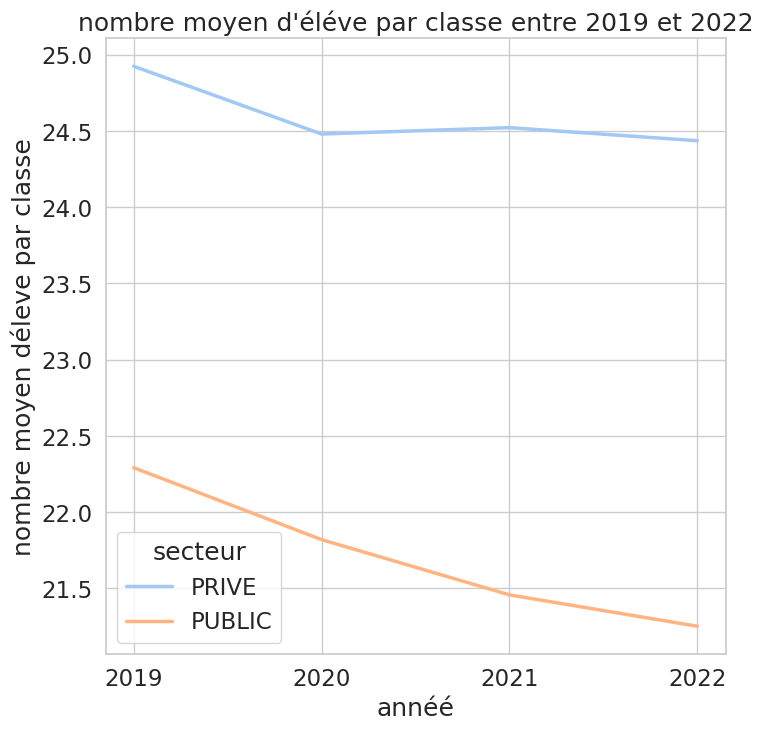

In [42]:
fig,ax = plt.subplots()
fig.set_size_inches(8,8)
sns.lineplot(data=france_ecole_public_prive,x='rentree_scolaire',y='Nombre_eleves_par_classe_moyenne',hue="secteur",ax=ax)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_title("nombre moyen d'éléve par classe entre 2019 et 2022")
ax.set_xlabel("annéé")
ax.set_ylabel("nombre moyen déleve par classe")
ax.set_ylim()
plt.show()

Les éléves sont plus nombreux dans les classes du privée que dans les classes du public.<br>
On peux noter une chute du nombre d'éléve dans les 2 secteur. Mais une chute plus forte dans le public.<br> 

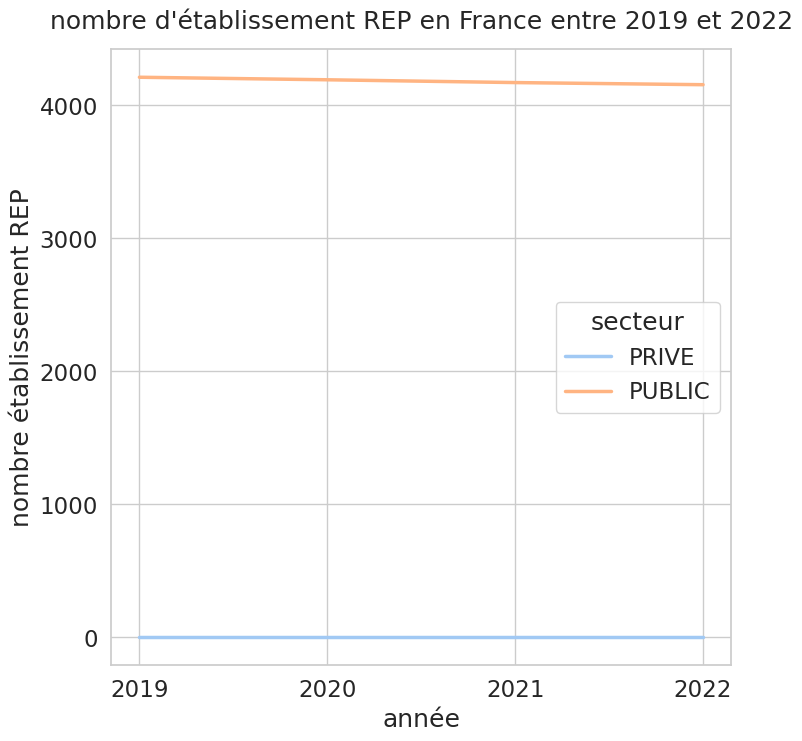

In [43]:
fig,ax = plt.subplots()
fig.set_size_inches(8,8)
sns.lineplot(data=france_ecole_public_prive,x='rentree_scolaire',y='rep',hue='secteur',ax=ax)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_title("nombre d'établissement REP en France entre 2019 et 2022",pad=15)
ax.set_xlabel("année")
ax.set_ylabel("nombre établissement REP")
ax.set_ylim()
plt.show()

Pas de REP en privée.

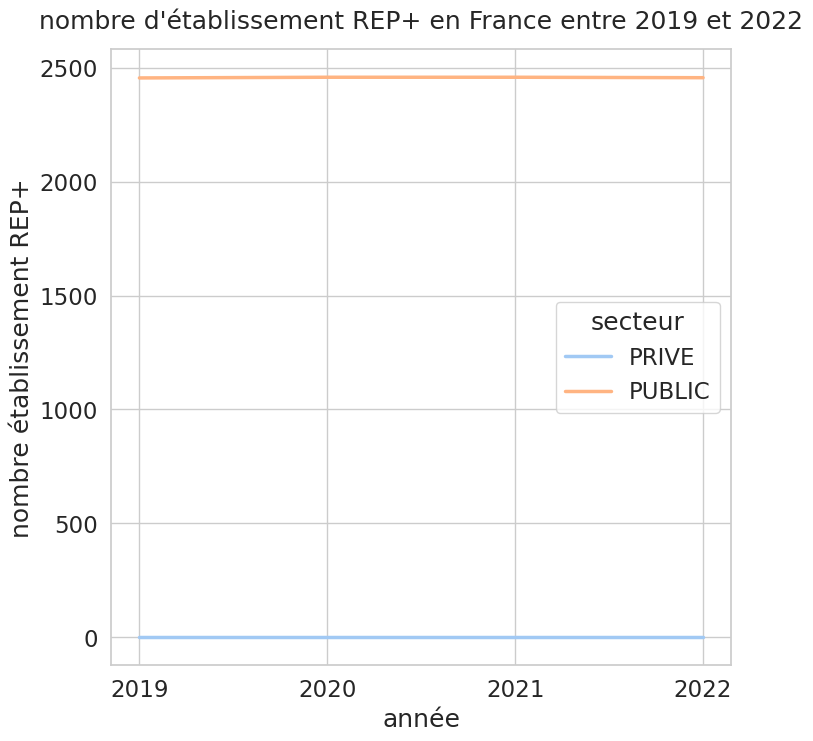

In [44]:
fig,ax = plt.subplots()
fig.set_size_inches(8,8)
sns.lineplot(data=france_ecole_public_prive,x='rentree_scolaire',y='rep_plus',hue='secteur',ax=ax)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_title("nombre d'établissement REP+ en France entre 2019 et 2022",pad=15)
ax.set_xlabel("année")
ax.set_ylabel("nombre établissement REP+")
ax.set_ylim()
plt.show()

pas de REP+ en privée.

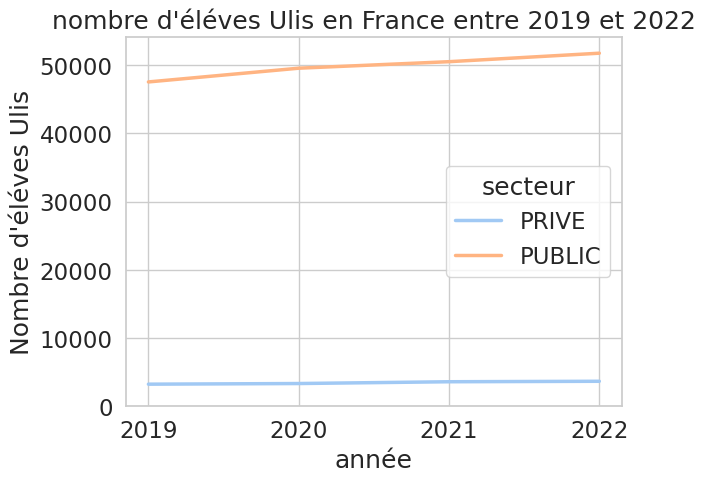

In [45]:
fig,ax = plt.subplots()
sns.lineplot(data=france_ecole_public_prive,x='rentree_scolaire',y='nombre_eleves_ulis',hue="secteur",ax=ax)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_title("nombre d'éléves Ulis en France entre 2019 et 2022")
ax.set_xlabel("année")
ax.set_ylabel("Nombre d'éléves Ulis")
ax.set_ylim(0)
plt.show()

Il y a des éléves Ulis dans le privée et dans le public

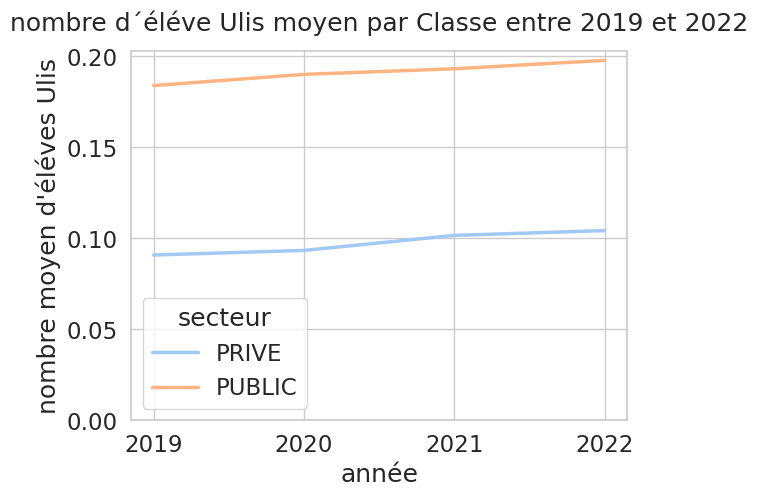

In [46]:
fig,ax = plt.subplots()
sns.lineplot(data=france_ecole_public_prive,x='rentree_scolaire',y='ulis_moyen_classe',hue='secteur',ax=ax)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_title("nombre d´éléve Ulis moyen par Classe entre 2019 et 2022",pad=15)
ax.set_xlabel("année")
ax.set_ylabel("nombre moyen d'éléves Ulis")
ax.set_ylim(0)
plt.show()

Mais dans une proportion moindre. Il y a 2 fois plus d'éléve Ulis dans le public que dans le privée.

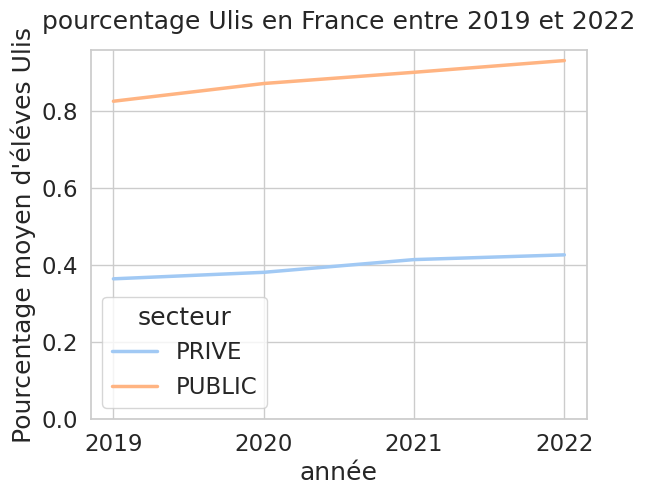

In [47]:
fig,ax = plt.subplots()
sns.lineplot(data=france_ecole_public_prive,x='rentree_scolaire',y='pourcentage_ulis',hue='secteur',ax=ax)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_title("pourcentage Ulis en France entre 2019 et 2022",pad=15)
ax.set_xlabel("année")
ax.set_ylabel("Pourcentage moyen d'éléves Ulis")
ax.set_ylim(0)
plt.show()

Nous avons donc 2 fois moins de chance d'avoir un éléves Ulis dans le privée que dans le public.

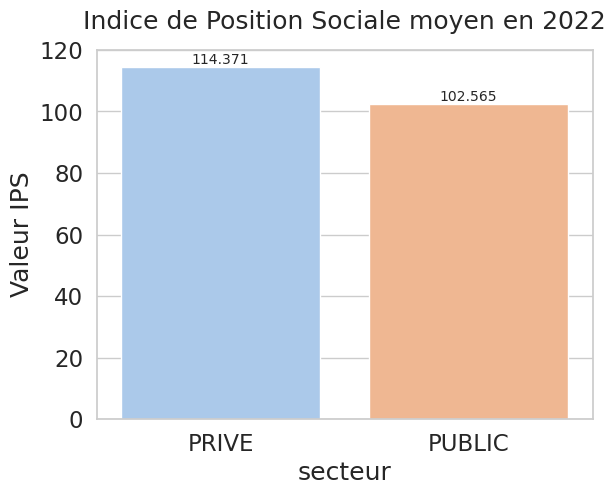

In [48]:
fig,ax = plt.subplots()
sns.barplot(data=france_ecole_public_prive,x='secteur', y="ips",ax=ax,estimator="sum",errorbar=None)
ax.set_title("Indice de Position Sociale moyen en 2022",pad=15)
ax.set_ylabel("Valeur IPS")
ax.bar_label(ax.containers[0], fontsize=10)
ax.set_ylim(0)
plt.show()

Sans grande surprise, dans le privée le niveau social est plus haut.

In [49]:
fichier_ecole_elementaire.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194898 entries, 0 to 194897
Data columns (total 29 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   rentree_scolaire                        194898 non-null  int64  
 1   code_du_departement                     30059 non-null   object 
 2   uai                                     30059 non-null   object 
 3   nom_de_l_etablissment                   30059 non-null   object 
 4   code_insee_de_la_commune                30059 non-null   object 
 5   nom_de_la_commune                       30059 non-null   object 
 6   effectifs                               30059 non-null   float64
 7   ips                                     30059 non-null   float64
 8   region_academique                       194898 non-null  object 
 9   academie                                194898 non-null  object 
 10  departement                             1948

<Axes: xlabel='ips', ylabel='nombre_eleves_ulis'>

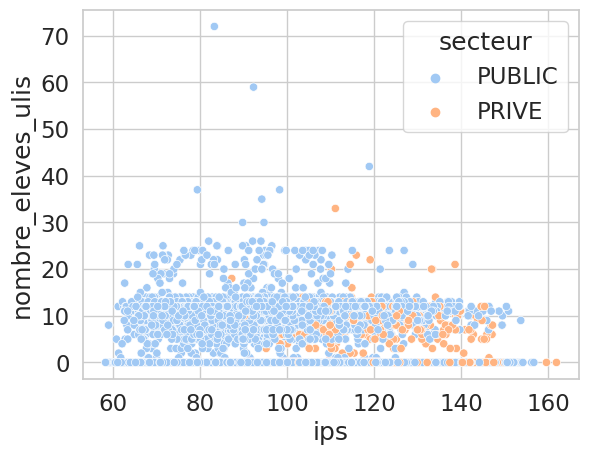

In [50]:
sns.scatterplot(data=fichier_ecole_elementaire,x='ips',y='nombre_eleves_ulis',hue='secteur' )

In [51]:
fichier_ecole_elementaire['Nombre_eleves_par_classe_moyenne'] = fichier_ecole_elementaire['nombre_total_eleves'] / fichier_ecole_elementaire['nombre_total_classes']
fichier_ecole_elementaire["ulis_moyen_classe"] = fichier_ecole_elementaire["nombre_eleves_ulis"] / fichier_ecole_elementaire["nombre_total_classes"]

<Axes: xlabel='ips', ylabel='Nombre_eleves_par_classe_moyenne'>

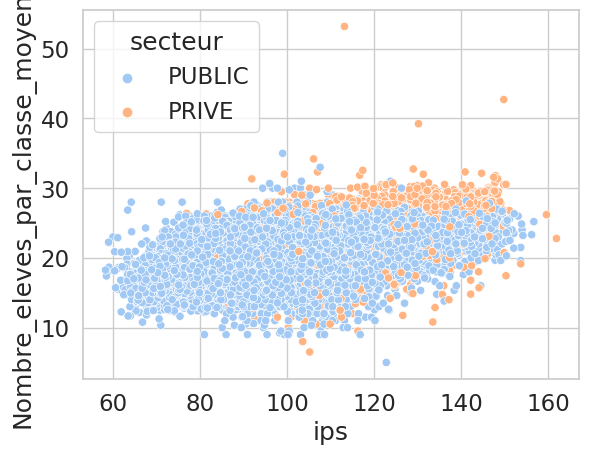

In [52]:
sns.scatterplot(data=fichier_ecole_elementaire,x='ips',y='Nombre_eleves_par_classe_moyenne',hue='secteur' )

In [53]:
fichier_ecole_elementaire.to_csv('donnee_temp/ecole.csv',index=False)